In [1]:
import os
import h5py
import scipy.stats as ss
import numpy as np
import scipy
from scipy.stats import gaussian_kde
from scipy.special import logsumexp
from scipy.signal import savgol_filter

%matplotlib inline
import seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from importlib import reload

In [2]:
import sys
path = "../"
sys.path.append(path)

import functions, models, gnobs, analysis_data
import read_pe_samples
from conversions import *

In [3]:
params = {'font.family': 'serif',
          'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large','font.size':15}
plt.rcParams.update(params)
inches_to_cm = 2.54
figsize = (40/inches_to_cm, 13/inches_to_cm)
dpi = 300

In [4]:
#Read Data
nsamp = 7000
injections, pe = {}, {}
pe_dir = '../gw_data/o1o2_ifar6_phenompv2/*.hdf5'
pe['o1o2'] = read_pe_samples.read_pesamples(pe_dir, nsamp)

fname = '../gw_data/o1o2_bbhpop_siminj.hdf'
injections['o1o2'] = functions.read_injections_o1o2(fname)
_, injections = analysis_data.reweight_data_to_UinComov({}, injections)

In [5]:
choice = ''
fname = path + 'results/' + 'o1o2_UinComov_ng5_AD0.1_ifar5.0_pv2_ak1.hdf5'

directory = path + 'plots/' + fname.split('/')[-1][:-5]
print (directory)

../plots/o1o2_UinComov_ng5_AD0.1_ifar5.0_pv2_ak1


In [6]:
fmodc = h5py.File('../gw_data/dRdm1_one_comp_IMRPhenomPv2.h5', 'r')
fmodc_ppds = fmodc['ppds']['model_c'][:]
lines = fmodc['lines']['model_c'][:]
fmodc.close()
modc_ax = np.linspace(5., 100., 1000)
fmodc_lines = np.array([line / np.sum(line) / (modc_ax[1] - modc_ax[0]) for line in lines])
fmodc_ppds = np.percentile(fmodc_lines, 50., axis = 0)
p5_modc, p95_modc = np.percentile(fmodc_lines, 5., axis = 0), np.percentile(fmodc_lines, 95., axis = 0)

In [7]:
if not os.path.exists(directory):
    os.makedirs(directory)
elif choice == 'y':
    pass
else:
    print ('Directory already exist! Proceed ?')
    choice = input().lower()

In [8]:
results = functions.read_results(fname)

In [9]:
fname = '../results/o1o2_UinComov_ng4_AD0.1_ifar5.0_pv2_ak1.hdf5'
results1 = functions.read_results(fname)
fname = '../results/o1o2_UinComov_ng8_AD0.1_ifar5.0_pv2_ak1.hdf5'
results2 = functions.read_results(fname)

In [10]:
nobs = results['args_sampler']['nobs']
rate = results['posteriors']['rate']
likelihood = results['posteriors']['log_lkl']
post_pdfs_mch = results['ppd']['post_pdf_mch']
post_pdfs_sz = results['ppd']['post_pdf_sz']
post_pdfs_q = results['ppd']['post_pdf_q']
post_pdfs_mass = results['ppd']['post_pdf_mass']
post_pdfs_mass1 = results['ppd']['post_pdf_mass1']
ppd_mch = results['ppd']['ppd_mch'].flatten()
ppd_q = results['ppd']['ppd_q'].flatten()
ppd_s1z = results['ppd']['ppd_s1z'].flatten()
ppd_s2z = results['ppd']['ppd_s2z'].flatten()
ppd_chieff = results['ppd']['ppd_chieff'].flatten()

mass_ax = results['args_ppd']['mass_ax']
mch_ax = results['args_ppd']['mch_ax']
q_ax = results['args_ppd']['q_ax']
sz_ax = results['args_ppd']['sz_ax']
ppd_m1, ppd_m2 = qmch_to_m1m2(ppd_mch, ppd_q)
ppd_M = ppd_m1 + ppd_m2

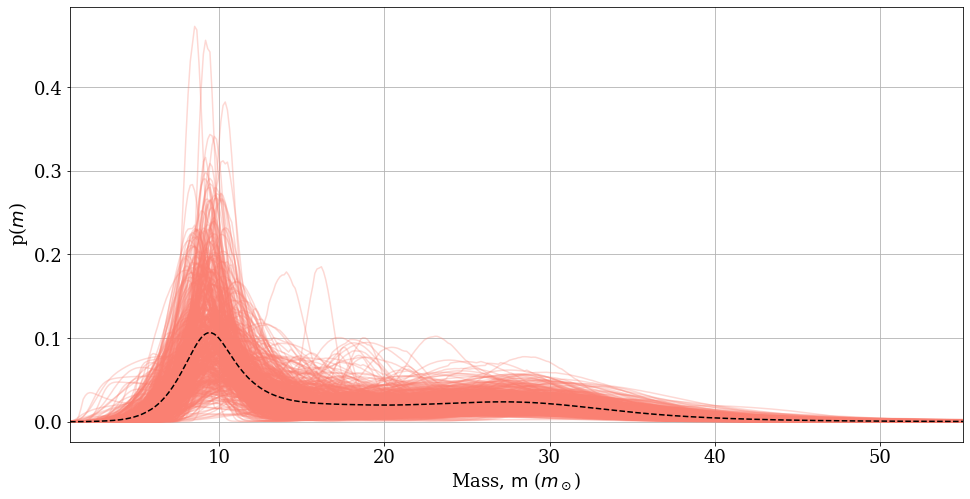

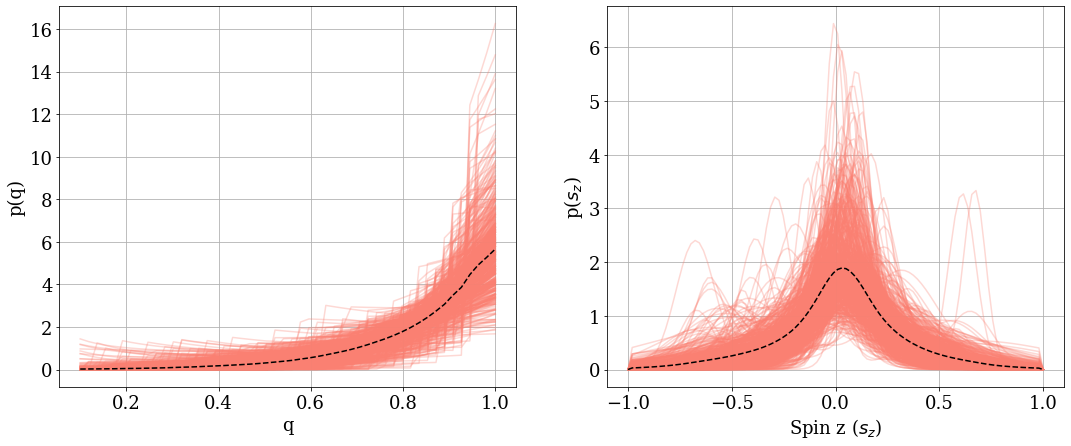

In [11]:
fig = plt.figure(figsize = (16.0, 8.0))
for ii, pdf in enumerate(post_pdfs_mass):
    plt.plot(mass_ax, pdf, color = 'salmon', alpha = 0.3)

plt.plot(mass_ax, np.mean(post_pdfs_mass, axis = 0), color = 'black', linestyle = '--')
plt.xlim(1., 55.)
plt.grid()
plt.xlabel('Mass, $\mathrm{m}$ ($m_\odot$)')
plt.ylabel('p($m$)')
plt.savefig(directory + '/sphagetti_mass.jpg', dpi = dpi, bbox_inches = 'tight')

fig = plt.figure(figsize = (18.0, 7.0))
plt.subplot(1, 2, 1)
for ii, pdf in enumerate(post_pdfs_q):
    plt.plot(q_ax, pdf, color = 'salmon', alpha = 0.3)

plt.plot(q_ax, np.mean(post_pdfs_q, axis = 0), color = 'black', linestyle = '--')
plt.grid()
plt.xlabel('q')
plt.ylabel('p(q)')
plt.subplot(1, 2, 2)
for ii, pdf in enumerate(post_pdfs_sz):
    plt.plot(sz_ax, pdf, color = 'salmon', alpha = 0.3)

plt.plot(sz_ax, np.mean(post_pdfs_sz, axis = 0), color = 'black', linestyle = '--')
plt.grid()
plt.xlabel('Spin z ($s_z$)')
plt.ylabel('p($s_z$)')

plt.savefig(directory + '/sphagetti_q_sz.jpg', dpi = dpi, bbox_inches = 'tight')

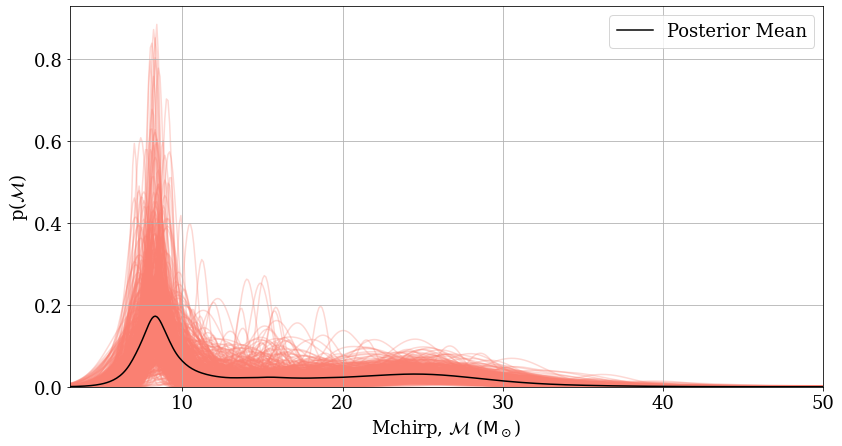

In [12]:
fig = plt.figure(figsize = (9.0 * 1.5, 7.0))
for ii, pdf in enumerate(post_pdfs_mch):
    plt.plot(mch_ax, pdf, color = 'salmon', alpha = 0.3, zorder = 1)

plt.plot(mch_ax, np.mean(post_pdfs_mch, axis = 0), color = 'black', label = 'Posterior Mean')
#plt.plot(mch_ax, ll_varobs_mean, color = 'black', linestyle = '--', label = 'Observed $\mathcal{M}$')

plt.xlabel('Mchirp, $\mathcal{M}$ ($\mathrm{M}_\odot$)')
plt.ylabel('p($\mathcal{M}$)')
plt.legend(loc = 'upper right')
plt.xlim(3.,50.)
plt.ylim(0, None)
plt.grid()
plt.savefig(directory + '/sphagetti_mchirp.jpg', dpi = dpi, bbox_inches = 'tight')

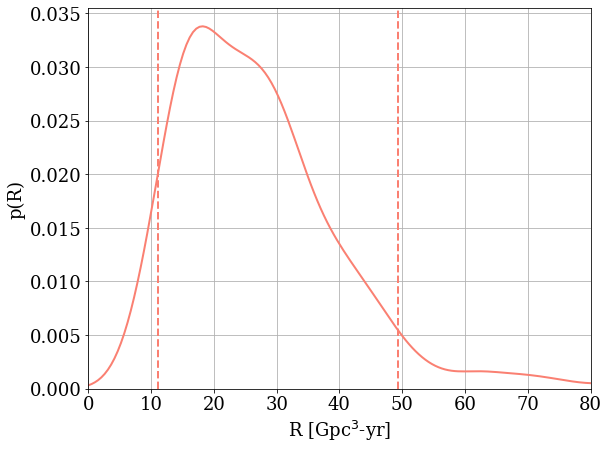

In [13]:
fig = plt.figure(figsize = (9.0, 7.0))
seaborn.kdeplot(rate, color = 'salmon', linewidth=2.)
plt.axvline(x = np.percentile(rate, 5.), linestyle = '--', color = 'salmon', linewidth=2.)
plt.axvline(x = np.percentile(rate, 95.), linestyle = '--', color = 'salmon', linewidth=2.)
plt.xlabel('R [Gpc$^3$-yr]')
plt.ylabel('p(R)')
plt.grid()
plt.xlim(0., 80.)
plt.savefig(directory + '/rate_posterior.jpg', dpi = dpi, bbox_inches = 'tight')

In [14]:
nperkde = 25
print (len(ppd_M[::nperkde]))
ncontour = 11

11820


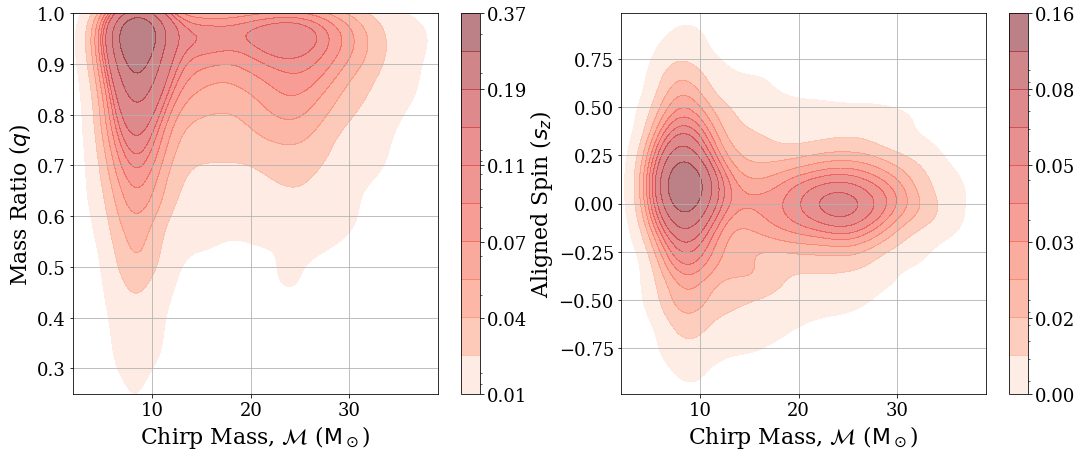

In [15]:
fig = plt.figure(figsize = (18.0, 7.0))
plt.subplot(1, 2, 1)
levels = np.linspace(0.05, 1, 11)
seaborn.kdeplot(x=ppd_mch[::nperkde], y=ppd_q[::nperkde], cmap="Reds", alpha = 0.5,\
                shade=True, cbar=True, levels = levels, norm=LogNorm(), cbar_kws = {'format': '%2.2f'})
plt.grid()
plt.xlabel('Chirp Mass, $\mathcal{M}$ ($\mathrm{M}_\odot$)', fontsize=22)
plt.ylabel('Mass Ratio ($q$)', fontsize=22)
plt.ylim(0.25, 1.0)
plt.xlim(2, 39.)
plt.subplot(1, 2, 2)
seaborn.kdeplot(x=ppd_mch[::nperkde], y=ppd_s1z[::nperkde], cmap="Reds", alpha = 0.5,\
                shade=True, cut = 0, cbar=True, levels = levels, norm=LogNorm(), cbar_kws = {'format': '%2.2f'})
plt.grid()
plt.xlabel('Chirp Mass, $\mathcal{M}$ ($\mathrm{M}_\odot$)', fontsize=22)
plt.ylabel('Aligned Spin ($s_z$)', fontsize=22)
plt.ylim(-0.99, 0.99)
plt.xlim(2, 39.)
plt.savefig(directory + '/mchirp_q_sz.jpg', dpi = 200, bbox_inches = 'tight')

In [16]:
#90% Confidence Intervals
print ('Rate')
p5, p50, p95 = np.percentile(rate, 5.), np.mean(rate), np.percentile(rate, 95.)
print (np.round(p5, 2), '-' ,np.round(p95, 2))
print (np.round(p50, 2), '+',np.round(p95 - p50, 2), '-',np.round(p50 - p5, 2))
#Post o3a LIGO rate: 
lp5, lp95, lp50 = 15.3, 38.8, 23.9
lp50 = 0.5 * (lp5 + lp95)
print ('Masses')
masses = np.append(ppd_m1, ppd_m2)
p1, p99 = np.percentile(masses, 1.), np.percentile(masses, 99.)
print (np.round(np.percentile(masses[masses > p99], 5.), 2), np.round(np.percentile(masses[masses > p99], 95.), 2))
print (np.round(np.percentile(masses[masses < p1], 5.), 2), np.round(np.percentile(masses[masses < p1], 95.), 2))
print ('Mass - ratio:', np.round(np.percentile(ppd_q, 10.), 2), np.round(len(ppd_q) / 1./len(ppd_q[ppd_q < 1/1.9 ** 2]), 2))
print ('Other stuff')
print (np.round(np.percentile(ppd_s1z, 5.), 2), np.round(np.percentile(ppd_s1z, 95.), 2))

Rate
11.17 - 49.31
26.99 + 22.32 - 15.82
Masses
45.62 80.79
2.81 5.41
Mass - ratio: 0.62 115.34
Other stuff
-0.52 0.51


### Plots with confidence interval

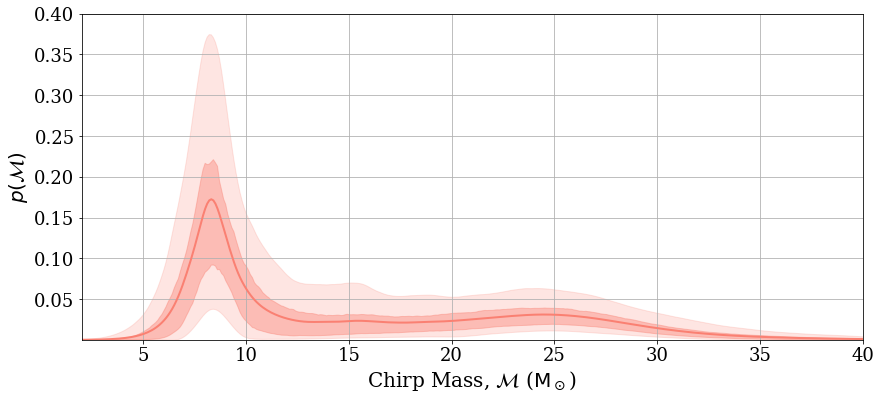

In [17]:
mch_ul90 = savgol_filter(np.percentile(np.array(post_pdfs_mch), 5., axis = 0), 25, 2)
mch_ll90 = savgol_filter(np.percentile(np.array(post_pdfs_mch), 95., axis = 0), 25, 2)
mch_ul50 = np.percentile(np.array(post_pdfs_mch), 25., axis = 0)
mch_ll50 = np.percentile(np.array(post_pdfs_mch), 75., axis = 0)
mean_mch_pdf = np.mean(np.array(post_pdfs_mch), axis = 0)

axmch = 0.5 * (results['args_sampler']['ref_mch_samp'][1:] + results['args_sampler']['ref_mch_samp'][:-1])
daxmch = np.diff(results['args_sampler']['ref_mch_samp'])
fig = plt.figure(figsize = (14.0, 6.0))
plt.plot(mch_ax, mean_mch_pdf, color = 'salmon', linewidth = 2.)
plt.fill_between(mch_ax, mch_ul90, mch_ll90, alpha = 0.2, color = 'salmon')
plt.fill_between(mch_ax, mch_ul50, mch_ll50, alpha = 0.4, color = 'salmon')

plt.xlabel('Chirp Mass, $\mathcal{M}$ ($\mathrm{M}_\odot$)', fontsize=20)
plt.ylabel('$p(\mathcal{M})$', fontsize=20)
plt.xlim(2, 40.)
plt.ylim(1e-4, .4)
#plt.yscale('log')
plt.grid()
#plt.legend(loc = 'best')
plt.savefig(directory + '/confidence_mchirp.jpg', dpi = dpi, bbox_inches = 'tight')

In [18]:
post_pdfs_mass1_1 = results1['ppd']['post_pdf_mass1']
rate1 = results1['posteriors']['rate']
post_pdfs_mass1_2 = results2['ppd']['post_pdf_mass1']
rate2 = results2['posteriors']['rate']
mean_m_dr_1 = savgol_filter(np.percentile(np.array(post_pdfs_mass1_1).T, 50., axis = 1), 25, 2)
mean_m_dr_2 = savgol_filter(np.percentile(np.array(post_pdfs_mass1_2).T, 50., axis = 1), 25, 2)

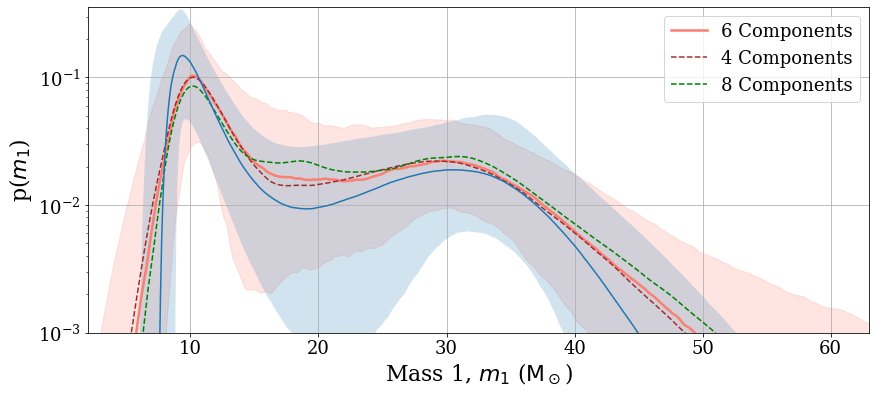

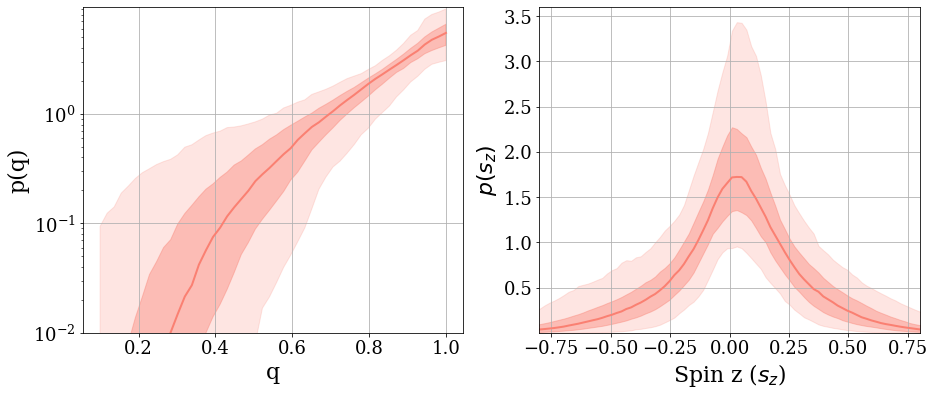

In [19]:
fig = plt.figure(figsize = (14.0, 6.0))
m1dr_ll90 = savgol_filter(np.percentile(np.array(post_pdfs_mass1).T, 5., axis = 1), 5, 2)
m1dr_ul90 = savgol_filter(np.percentile(np.array(post_pdfs_mass1).T, 95., axis = 1), 5, 2)
mean_m_dr = savgol_filter(np.percentile(np.array(post_pdfs_mass1).T, 50., axis = 1), 5, 2)

plt.plot(mass_ax, mean_m_dr, color = 'salmon', linewidth = 2.5, label = '6 Components')
plt.fill_between(mass_ax, m1dr_ll90, m1dr_ul90, alpha = 0.2, color = 'salmon')
#plt.fill_between(mass_ax, m1dr_ll50, m1dr_ul50, alpha = 0.4, color = 'salmon')
plt.plot(mass_ax, mean_m_dr_1, color = 'brown', linestyle = '--', linewidth = 1.5, label = '4 Components')
plt.plot(mass_ax, mean_m_dr_2, color = 'green', linestyle = '--', linewidth = 1.5, label = '8 Components')

plt.plot(modc_ax, fmodc_ppds)
plt.fill_between(modc_ax, p5_modc, p95_modc, alpha = 0.2)

plt.xlabel('Mass 1, $m_1$ ($\mathrm{M}_\odot$)', fontsize=22)
plt.ylabel('p($m_1$)', fontsize=22)
#plt.ylabel('$\mathrm{d}R/\mathrm{d}m_1[\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}\mathrm{M}_\odot^{-1}]$', fontsize=22)
plt.xlim(2., 63.)
plt.ylim(1e-3, None)
plt.yscale('log')
plt.grid()
plt.legend(loc = 'best')
plt.savefig(directory + '/confidence_mass.jpg', dpi = dpi, bbox_inches = 'tight')

fig = plt.figure(figsize = (15.0, 6.0))
plt.subplot(1, 2, 1)
q_ll90 = np.percentile(np.array(post_pdfs_q).T, 5., axis = 1)
q_ul90 = np.percentile(np.array(post_pdfs_q).T, 95., axis = 1)
q_ll50 = np.percentile(np.array(post_pdfs_q).T, 25., axis = 1)
q_ul50 = np.percentile(np.array(post_pdfs_q).T, 75., axis = 1)
mean_q_pdf = np.percentile(np.array(post_pdfs_q).T, 50., axis = 1)
plt.plot(q_ax, mean_q_pdf, color = 'salmon', linewidth = 2.0)
plt.fill_between(q_ax, q_ll90, q_ul90, alpha = 0.2, color = 'salmon')
plt.fill_between(q_ax, q_ll50, q_ul50, alpha = 0.4, color = 'salmon')
plt.grid()
plt.ylim(.01, None)
plt.yscale('log')
plt.xlabel('q', fontsize=22)
plt.ylabel('p(q)', fontsize=22)
#plt.ylabel('$\mathrm{d}R/\mathrm{d}q[\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}]$', fontsize=22)
plt.subplot(1, 2, 2)
sz_ll90 = np.percentile(np.array(post_pdfs_sz).T, 5., axis = 1)
sz_ul90 = np.percentile(np.array(post_pdfs_sz).T, 95., axis = 1)
sz_ll50 = np.percentile(np.array(post_pdfs_sz).T, 25., axis = 1)
sz_ul50 = np.percentile(np.array(post_pdfs_sz).T, 75., axis = 1)
mean_sz_pdf = np.percentile(np.array(post_pdfs_sz).T, 50., axis = 1)
plt.plot(sz_ax, mean_sz_pdf, color = 'salmon', linewidth = 2.0)
plt.fill_between(sz_ax, sz_ll90, sz_ul90, alpha = 0.2, color = 'salmon')
plt.fill_between(sz_ax, sz_ll50, sz_ul50, alpha = 0.4, color = 'salmon')
plt.grid()
plt.ylim(2e-3, None)
plt.xlim(-0.8, 0.8)
plt.xlabel('Spin z ($s_z$)', fontsize=22)
plt.ylabel('$p(s_z)$', fontsize=22)

plt.savefig(directory + '/confidence_q_sz.jpg', dpi = dpi, bbox_inches = 'tight')